#### Step 0: Setup API keys

Create a .env file with the API keys so dotenv can work appropriately.

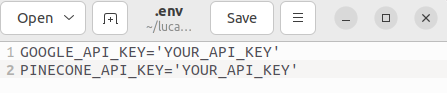

#### Step 1: Extract video urls and transcipts

In [27]:
from pytube import Playlist
from langchain_community.document_loaders import YoutubeLoader
from langchain_community.document_loaders.youtube import TranscriptFormat
from dotenv import load_dotenv
import os

load_dotenv() # .env path

True

In [6]:
playlists = ['https://www.youtube.com/playlist?list=PLwxNMb28XmpckOvZZ_AZjD7WM2p9-6NBv', # Self videos
             'https://www.youtube.com/playlist?list=PLwxNMb28XmpehnfQOa4c0E7j3GIj4qFEj', # Work Videos
             'https://www.youtube.com/playlist?list=PLwxNMb28Xmpfv2COuuJaKzy6E2n8nSMdi', # Literature videos
             'https://www.youtube.com/playlist?list=PLwxNMb28Xmpfv8ez3ItKS1Ti3T8o6f7Yy', # History videos
             'https://www.youtube.com/playlist?list=PLwxNMb28XmpeUL1vz9Su7OmeghBDgmj7X', # Eastern philosofy
             'https://www.youtube.com/playlist?list=PLwxNMb28XmpcEwc0qydf2jSszQFSht81E'  # Relationship videos
            ] 

videos = []

for playlist in playlists:
    p = Playlist(playlist)
    videos.extend(p)

#playlist_url = 'https://www.youtube.com/playlist?list=PLwxNMb28XmpehnfQOa4c0E7j3GIj4qFEj'
#p = Playlist(playlist_url)

#for url in p.video_urls[:3]:
#    print(url)

In [10]:
for url in videos[0:3]:
    print(url)

https://www.youtube.com/watch?v=lRDwAafSFgI
https://www.youtube.com/watch?v=gC5hAAvhClE
https://www.youtube.com/watch?v=QS5-Z-oP-Hw


In [9]:
len(videos)

732

In [4]:
transcripts = []

In [23]:
i = 0
#urls = p.video_urls
urls = videos
for i,url in enumerate(urls):
    if i <= 726:
        #break
        continue
    print(url,i)
    loader = YoutubeLoader.from_youtube_url(
        url,
        #add_video_info=True,
        language=["en", "en-GB"],
        #transcript_format=TranscriptFormat.CHUNKS,
        #chunk_size_seconds=90
    )
    #print("\n\n".join(map(repr, loader.load())))
    transcripts.extend(loader.load())
    i +=1

https://www.youtube.com/watch?v=88q8XDJKZVs 727
https://www.youtube.com/watch?v=NH6HBmuJ7A4 728
https://www.youtube.com/watch?v=QJN3Xd8EV80 729
https://www.youtube.com/watch?v=dh43cVtfMYs 730
https://www.youtube.com/watch?v=jcgW8pNQvo0 731


In [24]:
#type(transcripts)
len(transcripts)
#p.video_urls[14]

705

Each transcript is a langchain Document. It has two important fields: page_content -> The actual transcript; metadata: relevant video data such as its url

In [25]:
transcripts[:3]

[Document(metadata={'source': 'lRDwAafSFgI'}, page_content="a lot about our Behavior doesn't make sense until we can take on board a basic idea about the way that we humans are built that our biology privileges survival over self-awareness in other words the most important priority for members of our species is to live and to keep going not to pause understand and take stock place any new human in a terrible circumstance let's say in a home with a violent or alcoholic parent or an abusive or depressed one and it won't as one might imagine it could be able to focus clearly on what's gone wrong or mourn its condition it will simply as we've ascertained it must keep going in order to do this it will call upon a range of innate survival techniques it may start to think surprisingly well of its parents declaring them justified in their beatings selfishness or humiliations it might assiduously blame itself rather than sparing any pity for its own deprivations let's remember that a sense of s

#### Step 2 - Summarize each transcript in a way better tailored to the retrieval goal.
In this case the app is for recommendations of videos based on problems people report so I'll ask the LLM to summarize with this goal "in mind".

In [31]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain.chains import LLMChain
from langchain_core.prompts import ChatPromptTemplate

In [32]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [36]:
summaries = []

In [37]:
# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system", 
      "Write a summary and main ideas, concepts and keywords of the philosophy video transcripts below. Also list common problems the videos can help humans face"),
    ("human", "{context}")]
)

# Instantiate chain
#chain = create_stuff_documents_chain(llm, prompt)
chain = LLMChain(llm=llm, prompt=prompt)

for transcript in transcripts:
    print(type(transcript))
    # Invoke chain
    result = chain.invoke({"context":transcript})
    summaries.append(result)

#result = chain.invoke({"context":transcripts})

<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_core.documents.base.Document'>
<class 'langchain_co

In [38]:
len(summaries)

705

In [39]:
summaries

[{'context': Document(metadata={'source': 'lRDwAafSFgI'}, page_content="a lot about our Behavior doesn't make sense until we can take on board a basic idea about the way that we humans are built that our biology privileges survival over self-awareness in other words the most important priority for members of our species is to live and to keep going not to pause understand and take stock place any new human in a terrible circumstance let's say in a home with a violent or alcoholic parent or an abusive or depressed one and it won't as one might imagine it could be able to focus clearly on what's gone wrong or mourn its condition it will simply as we've ascertained it must keep going in order to do this it will call upon a range of innate survival techniques it may start to think surprisingly well of its parents declaring them justified in their beatings selfishness or humiliations it might assiduously blame itself rather than sparing any pity for its own deprivations let's remember that 

The result of each summarization is a dictionary with two fields: "context" and "text".

The "context" is the original transcript. \
The text is the actual summary. 

To prepare for the next step - embeeding - I will create documents with the summarization (in the text), and the relevant metadata.

In [40]:
summaries_text = [summary['text'] for summary in summaries]
metadata = [summary['context'] for summary in summaries]

In [41]:
metadata[0].metadata['source']

'lRDwAafSFgI'

In [42]:
len(metadata)

705

In [43]:
from langchain_core.documents import Document

documents = []

for i, summary in enumerate(summaries_text):
    document = Document(
        page_content= summary,
        metadata={'youtube_id': metadata[i].metadata['source']} # The only relevant metadata for this use case is video source
    )
    documents.append(document)


In [44]:
documents

[Document(metadata={'youtube_id': 'lRDwAafSFgI'}, page_content='## Summary and Main Ideas:\n\nThis passage explores the human tendency to prioritize survival over self-awareness, particularly in the face of trauma and adversity. It argues that our biology compels us to focus on simply "keeping going" rather than processing and understanding our pain, especially during childhood. This survival instinct can manifest in various ways, such as self-blame, overachievement, or unhealthy coping mechanisms.\n\nThe passage emphasizes that this survival-driven behavior can persist even into adulthood, hindering our ability to acknowledge and address the underlying emotional wounds. As we age and achieve external security, the suppressed trauma can resurface, leading to feelings of strangeness, anxiety, and even mental health issues. \n\nThe video suggests that therapy can provide a safe space to confront these long-suppressed emotions, allowing us to finally process the pain and find healing.\n\n

In [45]:
len(documents)

705

#### Step 3 - Embedding the summaries and placing them in an index within a Vector Store

In [46]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from pinecone import Pinecone, ServerlessSpec
import time
from langchain_pinecone import PineconeVectorStore


embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
pinecone_api_key = os.environ.get("PINECONE_API_KEY")
pc = Pinecone(api_key=pinecone_api_key)

In [47]:
index_name = "school-of-life-index"  # change if desired

existing_indexes = [index_info["name"] for index_info in pc.list_indexes()]

if index_name not in existing_indexes:
    pc.create_index(
        name=index_name,
        dimension=768,
        metric="cosine",
        spec=ServerlessSpec(cloud="aws", region="us-east-1"),
    )
    while not pc.describe_index(index_name).status["ready"]:
        time.sleep(1)

index = pc.Index(index_name)

In [48]:
# This line attachs the embedding model to the Vector Store and defines the index to work with
vector_store = PineconeVectorStore(index=index, embedding=embeddings)

In [49]:
# Effectively adding the documents (transcript plus the metadata)
vector_store.add_documents(documents=documents)

['329aa83d-fec8-42e5-b1cb-dce90fb59d47',
 '9aede47f-19e3-4b0d-b639-b935f172297e',
 'a593a813-0f92-4174-bf49-51d2ad22ef87',
 'aa2292c7-9fb6-48c5-9250-c16a46963adf',
 '70223d02-5e58-476a-ac31-583303e12b1f',
 '79863b9c-87a4-44ff-9101-d89883b14596',
 'c2256575-d88a-4795-a02f-681aaed96c1f',
 'b5f12780-8830-4eff-8636-72713a6ad0f8',
 'f30318cb-2556-4f4f-b77b-5456b6fe0e22',
 '870c1bb8-a443-4ba2-89ce-38b49b7d597d',
 '4e31d129-a0b2-4021-a115-0e8687663f0e',
 '51302de4-4bbe-4f2e-b18b-5cf2e8d3654e',
 '2b12a764-74a0-4c27-85ee-c05d91950e1f',
 '579f40fe-354a-48b4-a26c-27df00b0e15e',
 '676ce046-8c67-4951-b13f-8e6e295ece36',
 '50fae732-1664-405e-b235-b3a3815ce03f',
 '5bbac734-bcbe-4432-a8fd-73e3b8e99265',
 '263ad60a-f508-42ef-97c2-d36a25f04099',
 'ccf339ad-df90-4a63-b3d6-7821e3d54c86',
 '057ed744-84ef-4024-9297-e61664b6179d',
 '9efea3c2-e20b-4c0b-9599-0bbc21bb0add',
 '21ecce73-345f-4d8c-84f6-9e7a8c38c056',
 'c1745bbc-23f1-4cb2-a04a-1094fcd5263e',
 '1ea1fd3b-a71d-48cd-940c-777319fc7148',
 'b32f5df7-72bb-

Below is a test for similar/relevant retrieval.

The embedding model embeds the query, and the vector store fetchs to k most similar/relevant documents related to it.

In [51]:
results = vector_store.similarity_search(
    "I am feeling very ugly",
    k=5,
    #filter={"source": "tweet"},sharp_mcclintock
)
for res in results:
    print(f"* {res.page_content} [{res.metadata}]")

* ## Summary and Main Ideas:

This video explores the concept of feeling ugly and how it's not solely determined by physical appearance but by our inner state. The speaker argues that:

* **Feeling ugly is an internal experience**: It's not about objective beauty standards, but rather a reflection of our self-perception and mood.
* **Inner state influences perception**: Our self-esteem and confidence shape how we see ourselves, projecting our internal feelings onto our external appearance.
* **Love and external validation can be transformative**:  Being seen with love and kindness can help us overcome self-hatred and see ourselves more positively.
* **Confidence is a skill that can be learned**:  The speaker suggests that confidence can be cultivated through practice and tools like confidence prompt cards.

## Key Concepts and Keywords:

* **Self-perception**: How we see ourselves, influenced by our inner state and experiences.
* **Confidence**: A feeling of self-assurance and belief i

In [107]:
type(res.metadata)

dict

#### Step 4.1 - Preprocessing user query to better tailor it to show the video transcripts were embedded

In [52]:
# Define prompt
prompt = ChatPromptTemplate.from_messages(
    [("system", 
      "Write a summary, main ideas and keywords of the human inquiry below. Pin point day to day problems the inquiry is suggesting"),
    ("human", "{question}")]
)

# Instantiate chain
#chain = create_stuff_documents_chain(llm, prompt)
chain = LLMChain(llm=llm, prompt=prompt)

In [72]:
#question = 'I am facing hard times with my employees'
question = 'I need philosofical ideas for being creative'
result = chain.invoke({"question": question})

In [79]:
result

{'question': 'I need philosofical ideas for being creative',
 'text': '## Philosophical Ideas for Being Creative: A Summary\n\nThis inquiry explores the philosophical underpinnings of creativity, seeking to understand how we can cultivate a more creative mindset in our daily lives. It delves into the nature of creativity, its connection to freedom, and its potential to solve problems. \n\n**Main Ideas:**\n\n* **Creativity as a fundamental human capacity:**  It suggests that creativity is not a special talent reserved for a few but rather a natural ability inherent in everyone. \n* **The role of freedom in creativity:**  The inquiry emphasizes the importance of freedom of thought and action in fostering creativity. This freedom includes the ability to explore new ideas without judgment, to experiment, and to take risks.\n* **Creativity as a problem-solving tool:**  The inquiry highlights the potential of creativity to address challenges and find innovative solutions. It suggests that by

#### Step 4.2 - Retrieve relevant documents (transcripts and their metadata)

In [73]:
results = vector_store.similarity_search(
    result['text'],
    k=5,
    #filter={"source": "tweet"},sharp_mcclintock
)
result_string = ""
for res in results:
    result_string += f"* {res.page_content} [{res.metadata}]"

In [74]:
result_string

'* ## Summary and Main Ideas of the Philosophy Video Transcript:\n\nThis transcript explores the concept of **freedom** and how it\'s often stifled by the pressures of societal expectations and childhood conditioning. It argues that true freedom isn\'t about external circumstances but rather about **internal liberation** from the need to conform to others\' expectations. \n\n**Key Concepts:**\n\n* **Childhood Conditioning:** The video highlights how early childhood experiences, particularly the emphasis on obedience, shape our perception of freedom and our ability to express our authentic selves.\n* **Emotional Inheritance:** We inherit emotional patterns from our parents and caregivers, which can influence our relationships, choices, and overall sense of self.\n* **Subordination to Others:**  The transcript argues that we often subordinate our own desires and aspirations to the expectations of others, leading to dissatisfaction and a feeling of being trapped.\n* **Authenticity vs. Con

#### Step 5 - Create a friendly answer for the video recommentation.
Pass in the similar documents and the user question and ask for LLM to create a complete answer.

In [75]:
# Define prompt
prompt_answer = ChatPromptTemplate.from_messages(
    [("system", 
      "You are a philosofy video recomendation tool. Below you will receive the summary of video main ideas and the query that led to these recomendations. Explain very brefiely why each the video is recommended and provide the link by combining https://www.youtube.com/watch?v= and the youtube_id field"),
    ("user", "User initial question {question} \n Retrieval system recs: {recs}")]
)

# Instantiate chain
#chain = create_stuff_documents_chain(llm, prompt)
chain_answer = LLMChain(llm=llm, prompt=prompt_answer)

In [76]:
final_answer = chain_answer.invoke({"question":question, "recs": result_string})

final_answer

{'question': 'I need philosofical ideas for being creative',
 'recs': '* ## Summary and Main Ideas of the Philosophy Video Transcript:\n\nThis transcript explores the concept of **freedom** and how it\'s often stifled by the pressures of societal expectations and childhood conditioning. It argues that true freedom isn\'t about external circumstances but rather about **internal liberation** from the need to conform to others\' expectations. \n\n**Key Concepts:**\n\n* **Childhood Conditioning:** The video highlights how early childhood experiences, particularly the emphasis on obedience, shape our perception of freedom and our ability to express our authentic selves.\n* **Emotional Inheritance:** We inherit emotional patterns from our parents and caregivers, which can influence our relationships, choices, and overall sense of self.\n* **Subordination to Others:**  The transcript argues that we often subordinate our own desires and aspirations to the expectations of others, leading to dis

In [78]:
print(final_answer['text'])

Here are the recommendations based on your initial query "I need philosophical ideas for being creative":

* **https://www.youtube.com/watch?v=UCMqR8k-32E**:  This video is recommended because it encourages you to break free from societal expectations and embrace your authentic self, which is a key ingredient for creative expression. 
* **https://www.youtube.com/watch?v=kIF41JBJmD8**: This video emphasizes the importance of trusting your own mind and ideas.  By believing in your own intellectual capacity, you can unlock your creative potential. 
* **https://www.youtube.com/watch?v=NH6HBmuJ7A4**: This video showcases the power of collaboration and brainstorming, highlighting how exchanging ideas with others can spark creativity. 
* **https://www.youtube.com/watch?v=VETWXw7MIms**: This video encourages you to explore your creative interests beyond traditional job titles and find new pathways for expressing your passions. 
* **https://www.youtube.com/watch?v=8lz-qrVUecE**: This video high